<a href="https://colab.research.google.com/github/expely/Business-Analytics-Labs/blob/main/Assignments/assignment_07_data_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Assignment 7: Data Transformation with Airbnb Listings

In this assignment, you will:
- Load the Airbnb dataset you cleaned in Assignment 6
- Apply data transformation techniques like scaling, binning, encoding, and feature creation
- Make the dataset easier to use for tasks like pricing analysis, guest segmentation, or listing recommendations
- Practice writing up your analysis clearly so a business audience — like a host, marketing manager, or city partner — could understand it

## Why This Matters

Airbnb analysts, hosts, and city partners rely on clean and well-structured data to make smart decisions. Whether they’re adjusting prices, identifying high-performing listings, or designing better guest experiences, they need data that’s transformed, organized, and ready for use.

This assignment helps you practice that kind of real-world thinking: taking messy real data and getting it ready for action.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_07_data_transformation.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.

## 1. Setup and Load Your Data

You'll be working with the `cleaned_airbnb_data_6.csv` file you exported from Assignment 6. (Note: If you had significant errors with assignment 6, you can use the file named "airbnb_listings.csv" in the DataSets folder on GitHub as a backup starting point.)

### Do the following:
In Google Colab:
- Click the folder icon on the left sidebar
- Use the upload button to add your CSV file to the session
- Then use the code block below to read it into your notebook

Before getting started, make sure you import the libraries you'll need for this assignment:
- `pandas`, `numpy` for data manipulation
- `matplotlib.pyplot`, `seaborn` for visualizations


In [19]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read csv
df = pd.read_csv("/content/cleaned_airbnb_data_6.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4419 non-null   int64  
 1   listing_url                                   4419 non-null   object 
 2   scrape_id                                     4419 non-null   int64  
 3   last_scraped                                  4419 non-null   object 
 4   source                                        4419 non-null   object 
 5   name                                          4419 non-null   object 
 6   description                                   4372 non-null   object 
 7   picture_url                                   4419 non-null   object 
 8   host_id                                       4419 non-null   int64  
 9   host_url                                      4419 non-null   o

## 2. Check for Skew in a Numeric Column

### Business framing:  

Airbnb listings can have a wide range of values for things like price, availability, or reviews. These kinds of distributions can be hard to visualize, summarize, or model.

### Do the following:
Choose one **numeric column** that appears skewed and do the following:
- Plot a histogram
- Apply a transformation (e.g., log or other method)
- Plot again to compare

### In Your Response:
1. What column did you examine?
2. What transformation did you try, and why?
3. How did the transformed version help make the data more usable for analysis or stakeholder review?



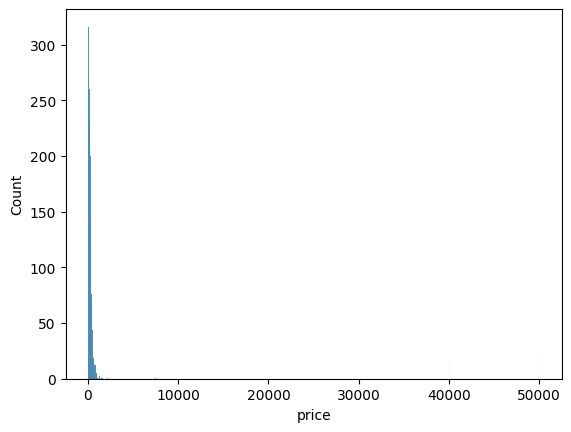

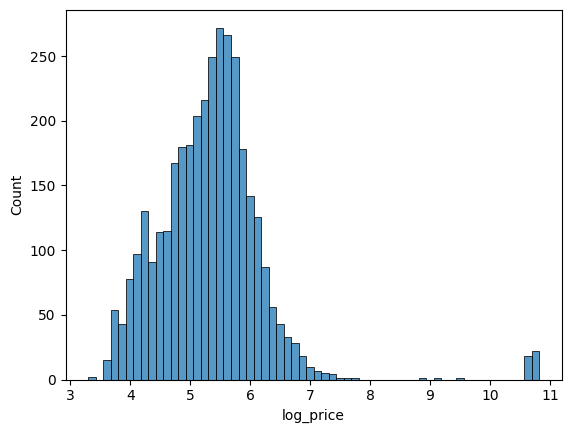

In [20]:
# Show a histogram for price
sns.histplot(data=df, x="price")
plt.show()

df['log_price'] = np.log1p(df['price'])
sns.histplot(data=df, x='log_price')
plt.show()

### ✍️ Your Response: 🔧
1. I examined the price column because I knew there were a lot of low-ends, but also a lot of outliers that made the graph hard to read.

2. I applied a natural log transformation since the data was so right-skewed and positive. It heavily reduces the impact that the outliers on the right side have on the column.

3. It more fairly represents the realistic prices you see everyday from airbnb listers, while still seeing some of the outliers. It also makes it so that price is a much smaller number and has less weight on the statistical model we will create later.

## 3. Scale Two Numeric Columns

### Business framing:

If an analyst wanted to compare listing price to number of nights required, or create a model that weighs both, those values need to be on a similar scale.

### Do the following:
- Pick two numeric columns with different value ranges (e.g. one column may have a min of 0 and a max of 255; another column may have a min of 100 and a max of 400)
- Use Min-Max scaling on one column (the range should be “shrinked” down to just 0-1)
- Use Z-score Normalization (aka standardization) on the other column.
- Add 2 new columns to the dataset. These 2 new columns should be the ones you just created.

### In Your Response:
1. What two columns did you scale, and which methods did you use?
2. When might these scaled values be more useful than the originals?
3. Who at Airbnb might benefit from this transformation and why?

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max scale
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['minimum_nights']])

df['minimum_nights_scaled'] = df_scaled[:, 0]

# Z-score scale
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['price']])

df['price_scaled'] = df_scaled[:, 0]

# Describe new scaled values
print(df[['price_scaled', 'minimum_nights_scaled']].describe())

       price_scaled  minimum_nights_scaled
count   3506.000000            4419.000000
mean       0.000000               0.042003
std        1.000143               0.058007
min       -0.153482               0.000000
25%       -0.134296               0.000000
50%       -0.116348               0.046745
75%       -0.093862               0.048414
max       10.156079               1.000000


### ✍️ Your Response: 🔧
1. I scaled minimum nights, and price. Minimum nights I used the minmax-scaler method, and for price I used the Standardization method.

2. These values will be more useful when we're comparing other data that is at a different magnitude. Min-Max scaling can specifically help when we use one-hot encoding for categories, since everything will be between 0-1.

3. This is going to help any of the data-scientists or statisticians who are creating models. They now have a more precise, and scalable way to compare different values. It can also  help with anyone looking to help with pricing strategy as they have a better way to compare price to much smaller numbers like number of bedrooms and what not.

## 4. Group a Numeric Column into Categories

### Business framing:  

Let’s say an Airbnb marketing team wants to segment listings by review activity. They don’t want exact numbers — they just want to know if a listing has “low,” “medium,” or “high” review volume.

### Do the following:

- Choose a numeric column that could be grouped (e.g., reviews, availability).
- You’ll want to group the values of this column into 3 or 4 bins
- Create a new column. The values of this column will be the labels: “Low”, “Medium”, and “High.” These labels should correspond to your bins.

### In Your Response:
1. What column did you group, and how many categories did you use?
2. Why might someone prefer this grouped view over raw numbers?
3. Who would this help at Airbnb, and how?


In [22]:
# Group bedrooms to categories
df['bedrooms_group'] = pd.qcut(df['bedrooms'], q=3, labels=['Low', 'Medium', 'High'])

# Preview new grouping
df['bedrooms_group'].value_counts()

,count
bedrooms_group,
Low,2853
Medium,917
High,648


### ✍️ Your Response: 🔧
1. I grouped bedrooms into 3 categories.

2. It's a lot easier to see and compare on a graph the rest of the variables to these 3 numbers, rather than each number of bedrooms. We have a lot better understanding of how something like average price for a place works when we only see it for 3 different groups.

3. This would help anyone who needs to build graphs and show the different price ranges for a given number of bedrooms. We can group them into their group and show them number. It would also help with modeling and showing to executives who are less-savy with understanding graphs, but love to look at them!

## 5. Create Two New Business-Relevant Variables

### Business framing:  

Stakeholders often want to know things like: What’s the cost per night? Are listings geared toward long-term stays? These kinds of features aren’t always in the dataset — analysts create them.

### Do the following:

- Think of two new columns you can create using the data you already have.
  - One might be a ratio or interaction between columns (e.g., price ÷ nights).
  - The other might be a flag based on a condition (e.g., stays longer than 30 days).
- Add the new columns to your DataFrame.

### In Your Response:
1. What two new columns did you create?
2. Who would use them (e.g., host, manager, or platform)?
3. How could they help someone make a better decision?

In [23]:
# Ratio of price per accommodate
df['price_per_person'] = df['price'] / df['accommodates']

# Long-Term Stays
df['is_long_term_stay'] = (df['minimum_nights'] >= 30).astype(int)

# Preview new columns
df[['price_per_person', 'is_long_term_stay']].head()

,price_per_person,is_long_term_stay
0,62.500000,0
1,64.500000,0
2,42.000000,0
3,70.000000,1
4,55.333333,1


### ✍️ Your Response: 🔧 🔧
1. I created a price per person column that takes the ratio of price per accommodates, and a long term stay column that sees if the person is staying longer than 30 days.

2. Hosts and property managers could use the price per person model. And an internal strategy team could use the long term stay model to track a different type of persona that uses Airbnb.

3. Price per person would allow the hosts to better understand if the price that they set for the property is competitive. While the long term stay could help an internal team like marketing design ads that are targeting some of those more nomadic, long-term residences.



## 6. Encode a Categorical Column

### Business framing:  

Let’s say you’re helping the Airbnb data science team build a model to predict booking rates. Categorical columns like `room_type`, `neighbourhood`, or `cancellation_policy` can’t be used in models unless they’re converted to numbers.

### Do the following:
- Choose one categorical column from your dataset (e.g., room type or neighborhood group)
- Decide on an encoding method:
  - Use one-hot encoding for nominal (unordered) categories
  - Use ordinal encoding (a ranking) only if the categories have a clear order
- Apply the encoding using `pandas` or another tool
- Add the new encoded column(s) to your DataFrame

### ✍️ In your markdown:
1. What column did you encode and why?
2. What encoding method did you use?
3. How could this transformation help a pricing model, dashboard, or business report?



In [24]:
# One-hot encode room types
df_encoded = pd.get_dummies(df, columns=['room_type'], prefix='room')

# Add encoded columns to original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Preview new data
df.filter(like='room_').head()

,room_type,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room
0,Entire home/apt,True,False,False,False
1,Entire home/apt,True,False,False,False
2,Entire home/apt,True,False,False,False
3,Entire home/apt,True,False,False,False
4,Entire home/apt,True,False,False,False


### ✍️ Your Response: 🔧
1. I chose to encode the room_type column so that we can analyze the different room categories compared to other variables.
2. I used one-hot encoding because there didn't seem to be an order of greatness. There can be in a hotel between Twin, Queen, King, Suite, etc. But in this case it's hard to say whether a hotel room vs. an Apartment vs. a private room is better.
3. It would allow better pricing estimates for specific types of rooms. We can also start to target these areas, or understand them better so we can know in future business reports whether they continue to be worth supporting.

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 11**, where you'll use the data in a regression model.

### Do the following:
Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Explanation:
# - "cleaned_airbnb_data_7.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually. Once you see the data in your files tab, just click on the three dots, then click “download”)
# - YOU MAY NEED TO PRESS “RUN” MULTIPLE TIMES IN ORDER FOR IT TO SHOW UP
# - FOR SOME DEVICES, IT MAY TAKE A FEW MINUTES BEFORE YOUR FILE SHOWS UP

```

In [25]:
# export csv here 🔧
df.to_csv("cleaned_airbnb_data_7.csv", index=False)

## 8. Reflection

You’ve applied the same kinds of transformation techniques used in real Airbnb analytics projects — from pricing engines to host tools to tourism dashboards.

Now step back and reflect.

### In Your Response:
1. What transformation step felt most important or interesting?
2. Which of your changes would be most useful to a host, analyst, or city planner?
3. If you were going to build a tool or dashboard, what would you do next with this data?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1. I really liked the logarithm method for visualizing price a bit better. While we determined there were some outliers in a super-extreme luxury category, they made the normal histogram graph look way right-skewed. It was really cool to transform it in a way that made it look more visually representative of the actual distribution.

2. To a host, I believe adding the price_per_person column is going to help since they can set their rates based on how many people they can accommodate. An analyst is going to like the scaling done to price and minimum nights so that they can compare the data better for statistical models. A city planner would probably like the bedroom grouping to better know how much demand there is of a city to zone into different sizes of housing.

3. I would probably group neighborhoods and create a digital map that allows you to see the different neighborhoods in Boston and compare the different data relative to that.
4. This is taking it a step closer from before, where we learned how to clean the data (which is something I wanted to learn in this class) to now we are also creating new data and columns based on that. It was way easier, cleaner, and more reproducable doing it in Python over Excel, which is exactly what my goal was! So, this relates directly to my goal of using Python for data analytics.



## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [26]:
!jupyter nbconvert --to html "assignment_07_data_transformation.ipynb"

[NbConvertApp] Converting notebook assignment_07_data_transformation.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 361090 bytes to assignment_07_data_transformation.html
